In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"]=True

In [7]:
df= pd.read_csv('googleplaystore.csv')

In [8]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
plt.rcParams["patch.force_edgecolor"]=True

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

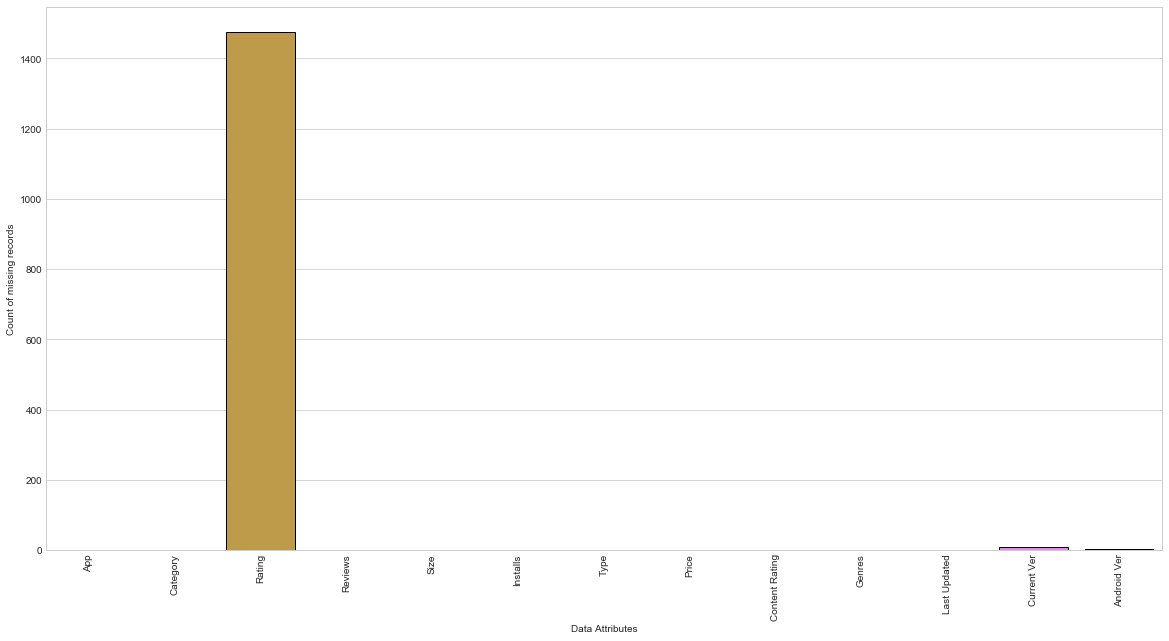

In [12]:
plt.figure(figsize=(20,10))
x= df.columns
y= df.isnull().sum()
sns.barplot(x,y)

ax =plt.gca()
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of missing records")
plt.xticks(rotation=90)


In [13]:
# Ratings are over 14000 entries. Ratings are also the only current numerical attribute. 

In [14]:
df['Rating'].median()

4.3

In [15]:
np.round(df['Rating'].mean())

4.0

In [16]:
# Two options for replacing 1400+ entries of Rating( mean or median)

In [17]:
(df['Rating']== 0).value_counts()

False    10841
Name: Rating, dtype: int64

In [18]:
# No Rating valued at 0 atleast.

In [19]:
# Before we jump into replacing these values of Rating we should consider all the other attributes that
# should be numerical in nature but are not. (Reviews, Installs, Price)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [21]:
# When trying to cast Reviews as a numeric, we get an error for entry 10472 that has 3.0M Reviews

In [22]:
df.replace(to_replace='3.0M',value='3000000',inplace=True)

In [23]:
df[df['Reviews'] == '3000000']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
df['Reviews'].max()

'9992'

In [25]:
# Two options for changing the type 

In [26]:
df['Reviews']=pd.to_numeric(df['Reviews'])

In [27]:
df['Reviews']= df['Reviews'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [29]:
# Reviews is now a float. Moving on to Size

In [30]:
# Size column has values such 10M, 11M, 3.0M. 
# M needs to be replaced by 6 zeros before we can convert this string to float/int object.
# k needs to be replaced by 3 zeros before we can convert this string to float/int object.
# Edit : need to change column to mb instead of bytes!

In [31]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
24M                    136
10M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
691k                     1
511k                     1
887k                     1
108k                     1
430k                     1
292k                     1
4

In [32]:
# Cleaning and Preprocessing Size column

In [33]:
df['Size'] = df['Size'].str.replace('M','000000')

In [34]:
df['Size']= df['Size'].str.replace('k','000')

In [35]:
# For Data analysis I chose to replace 'Varies with Device' with a common numerical 10MB

In [36]:
df['Size']=df['Size'].str.replace('.','')
df['Size']=df['Size'].str.replace('Varies with device','10000000')
df['Size']=df['Size'].str.replace('+','')
df['Size']=df['Size'].str.replace(',','')

In [37]:
df['Size'].value_counts()

10000000    1838
12000000     237
15000000     232
14000000     231
11000000     230
13000000     226
25000000     211
17000000     200
26000000     199
20000000     190
16000000     188
19000000     186
23000000     185
24000000     184
18000000     183
21000000     178
29000000     172
28000000     160
22000000     159
33000000     156
27000000     150
37000000     139
34000000     128
31000000     126
35000000     123
40000000     123
32000000     118
39000000     118
36000000     117
38000000     117
            ... 
624000         1
350000         1
562000         1
27000          1
313000         1
785000         1
39000          1
234000         1
173000         1
253000         1
600000         1
157000         1
714000         1
506000         1
713000         1
899000         1
913000         1
161000         1
865000         1
170000         1
270000         1
601000         1
980000         1
613000         1
308000         1
663000         1
523000         1
376000        

In [38]:
df[df['Size']=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [39]:
df['Size']=df['Size'].astype(float)

In [40]:
# BYTES TO MB

In [41]:
df['Size']=df['Size'].apply(lambda x: x/1000000)

In [42]:
df['Size'].mean()

34.28328936444974

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [44]:
# Now we will  make Price a numerical object.

In [45]:
df['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$3.49          7
$29.99         7
$7.99          7
$24.99         7
$19.99         6
$5.49          6
$11.99         5
$8.99          5
$12.99         5
$6.49          5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$13.99         2
$17.99         2
           ...  
$15.99         1
$3.08          1
$4.60          1
$1.50          1
$4.59          1
$109.99        1
$394.99        1
$1.26          1
$37.99         1
$1.61          1
$3.90          1
$200.00        1
$19.40         1
$1.29          1
$2.50          1
$3.88          1
$2.59          1
$3.61          1
$4.80          1
$4.29          1
$15.46         1
$3.04          1
$1.97          1
$1.75          1
$5.00          1
$2.95          1
$3.28          1
$3.02         

In [46]:
df['Price']=df['Price'].str.replace('$','')

In [47]:
df['Price'].value_counts()

0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
3.49          7
24.99         7
7.99          7
29.99         7
19.99         6
5.49          6
12.99         5
6.49          5
8.99          5
11.99         5
1.00          3
16.99         3
10.00         3
2.00          3
7.49          2
8.49          2
          ...  
1.97          1
1.75          1
2.95          1
1.59          1
1.50          1
30.99         1
4.77          1
4.59          1
37.99         1
3.04          1
3.90          1
28.99         1
2.56          1
4.80          1
3.08          1
1.96          1
3.02          1
89.99         1
1.61          1
3.61          1
2.50          1
200.00        1
4.84          1
14.00         1
379.99        1
1.29          1
1.04          1
15.99         1
2.59          1
154.99        1
Name: Price, Length: 93,

In [48]:
# Deeper look into column shows us something we need to fix. 'Everyone' cannot be converted to a float

In [49]:
df['Price'].max()

'Everyone'

In [50]:
df['Price'].min()

'0'

In [51]:
df['Price']=df['Price'].str.replace('Everyone','0')

In [52]:
df['Price'].max() # Incorrect Max value because of object type

'9.99'

In [53]:
df['Price']=df['Price'].astype(float)

In [54]:
df['Price'].max()        # Correct Max value

400.0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [56]:
# Now Installs

In [57]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [58]:
df['Installs']=df['Installs'].str.replace('+','')

In [59]:
df['Installs']=df['Installs'].str.replace('Free','0')

In [60]:
df['Installs']=df['Installs'].str.replace(',','')

In [61]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

In [62]:
df['Installs']=df['Installs'].astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null float64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [64]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,56.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,31.0,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [65]:
## Now usually I would replace the missing values in Rating with the mean or median.(4.3 or 4)
## However, the missing values are a big portion of the entire column therefore I chose to 
## input a random generation of 2,2.5,3,3.5,4 so it does not skew our data too much.

In [66]:
df['Rating'].fillna(value=pd.Series(np.random.choice([2,2.5,3,3.5,4], size=len(df.index))), inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null float64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [68]:
# Now we can move onto replacing missing values for the rest of the dataset. 13 missing values altogether remain as shown
# in graph below

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

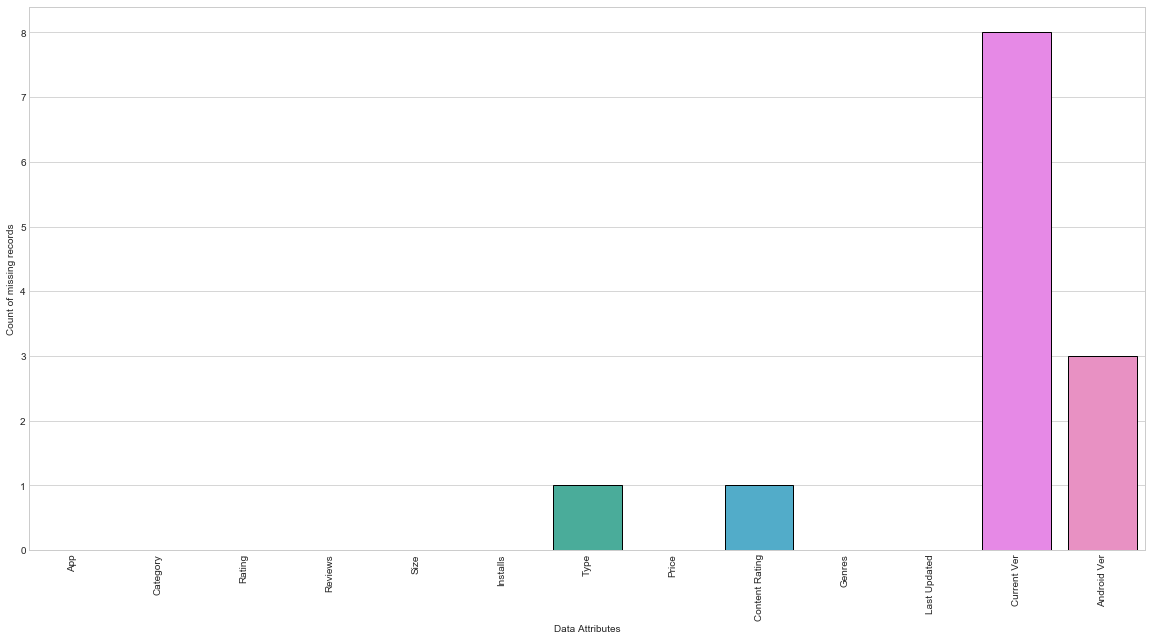

In [69]:
plt.figure(figsize=(20,10))
x= df.columns
y= df.isnull().sum()
sns.barplot(x,y)

ax =plt.gca()
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of missing records")
plt.xticks(rotation=90)

In [70]:
## Now that we have replaced the column with the most missing values we can focus on the columns
## with lesser missing values.

In [71]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,2.5,0.0,10.0,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [72]:
# Preprocessing of Type column

In [73]:
df['Type'].fillna(value='Free',inplace=True)
df['Type']=df['Type'].str.replace('0','Free')

In [74]:
df['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

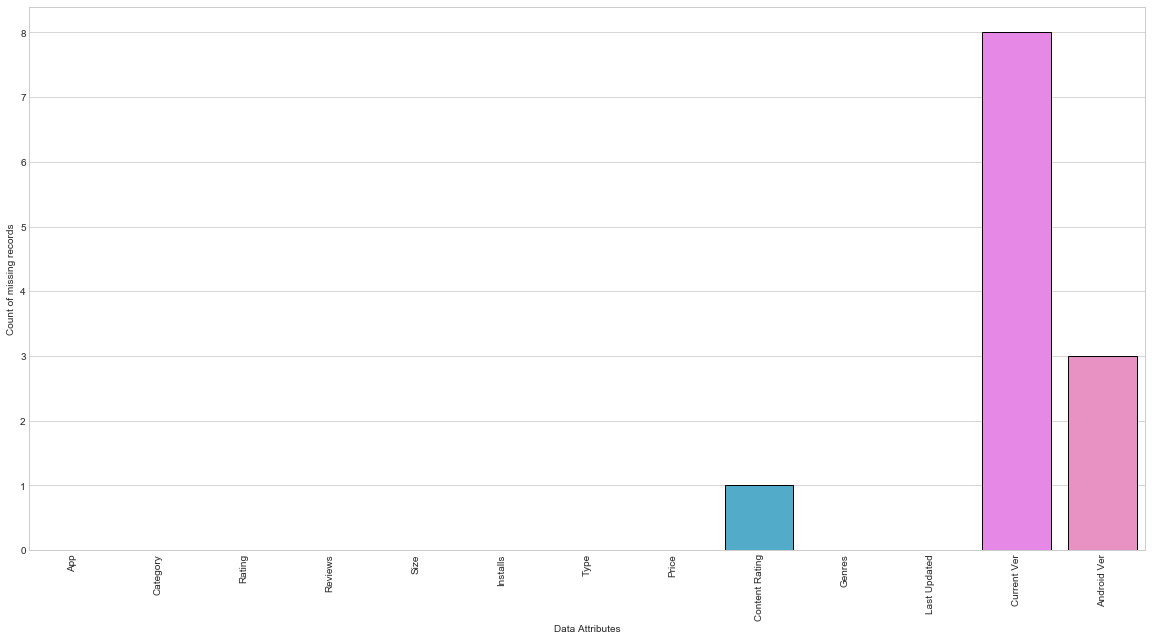

In [75]:
plt.figure(figsize=(20,10))
x= df.columns
y= df.isnull().sum()
sns.barplot(x,y)

ax =plt.gca()
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of missing records")
plt.xticks(rotation=90)

In [76]:
# Now we move on to Content Rating

In [77]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,0.001,0.0,Free,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [78]:
df['Content Rating'].fillna(value='Everyone',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

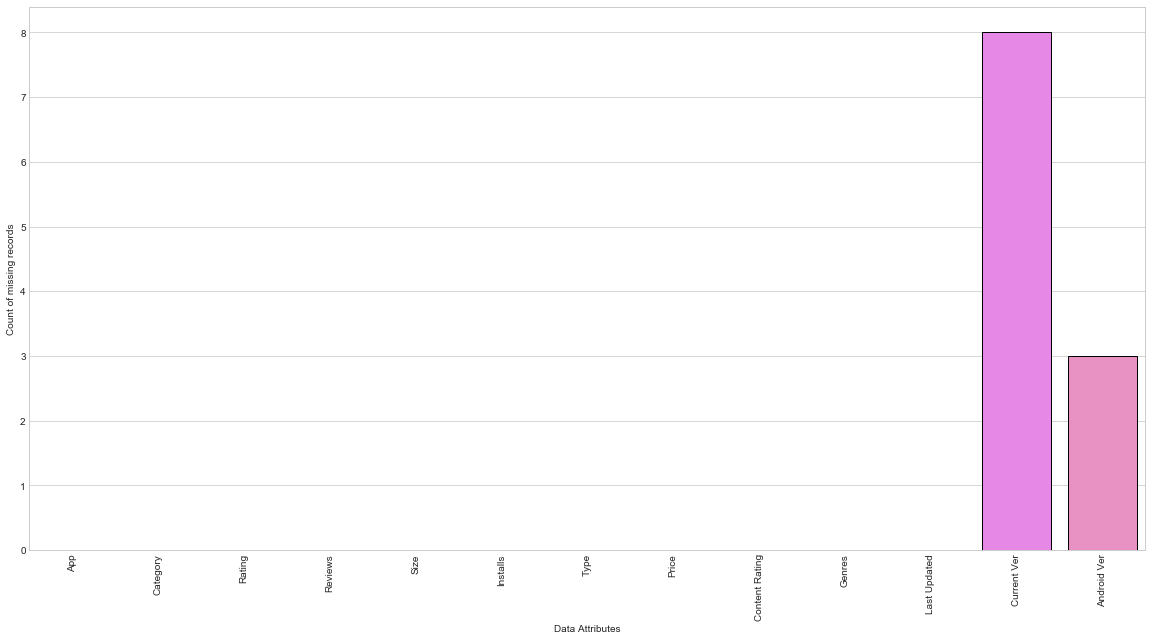

In [79]:
plt.figure(figsize=(20,10))
x= df.columns
y= df.isnull().sum()
sns.barplot(x,y)

ax =plt.gca()
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of missing records")
plt.xticks(rotation=90)

In [80]:
# Now we can move on to Current Ver with 8 missing values.

In [81]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,27.000,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,0.011,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,87.000,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,2.5,0.0,0.222,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14.000,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,3.0,44.0,72.000,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,2.5,1.0,0.237,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,3.0,8.0,0.658,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [82]:
# We do not necassrily have accurate information on the current version of these 8 entries. Therefore, just to
# fill them up we will input Varies with Device

In [83]:
df['Current Ver'].fillna(value='Varies with device',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

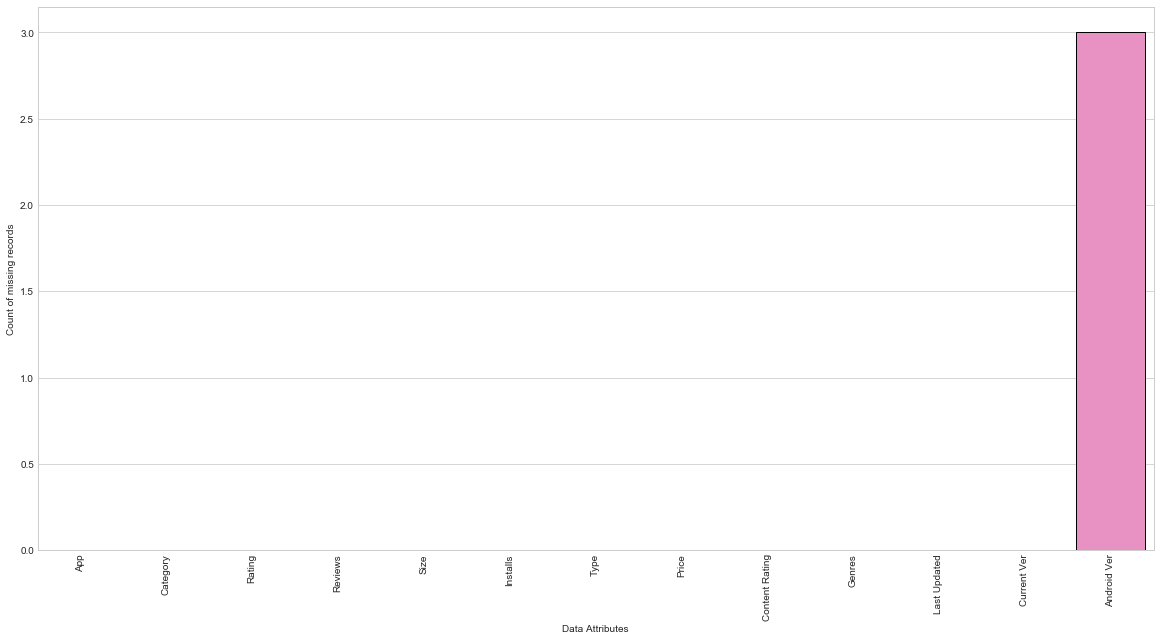

In [84]:
plt.figure(figsize=(20,10))
x= df.columns
y= df.isnull().sum()
sns.barplot(x,y)

ax =plt.gca()
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of missing records")
plt.xticks(rotation=90)

In [85]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
2.2 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [86]:
# Same reasoning here. We are not exactly sure about the 3 entries so we will input Varies with Device

In [87]:
df['Android Ver'].fillna(value='Varies with device',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

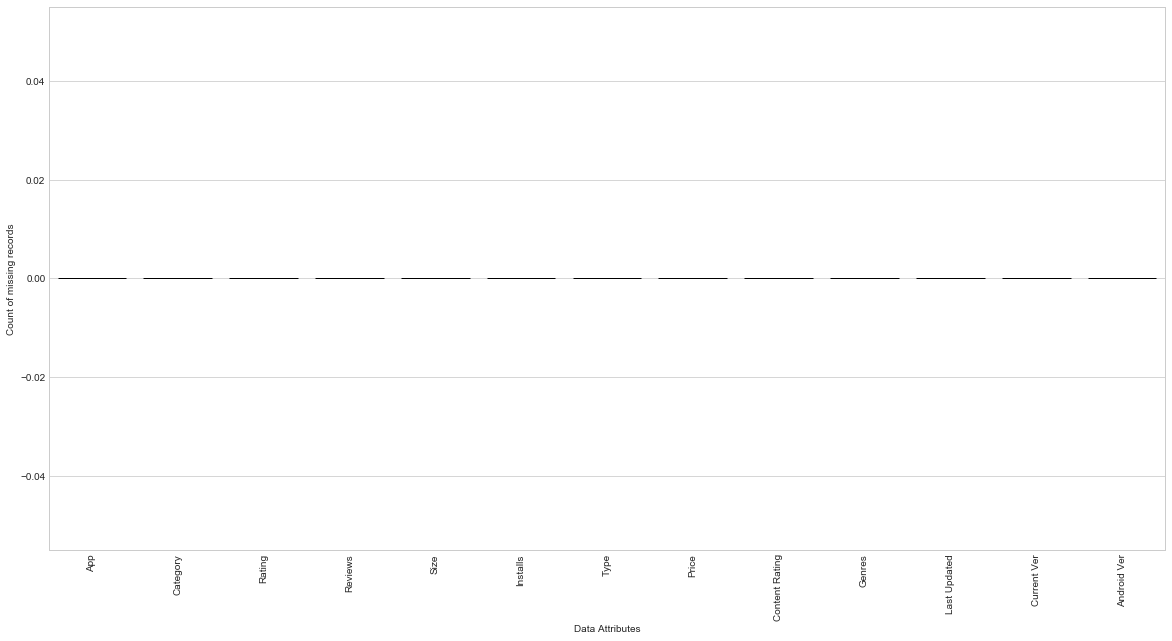

In [88]:
plt.figure(figsize=(20,10))
x= df.columns
y= df.isnull().sum()
sns.barplot(x,y)

ax =plt.gca()
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of missing records")
plt.xticks(rotation=90)

In [89]:
# This marks the end of our quest to make sure our dataset is full of values and that our numerical columns are floats.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null float64
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [91]:
# A little bit of data munging on the Category column

In [92]:
df[df['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,0.001,0.0,Free,0.0,Everyone,"February 11, 2018",1.0.19,4.0 and up,Varies with device


In [93]:
df['Category'].replace(to_replace='1.9',value='ART_AND_DESIGN',inplace=True)

In [94]:
# Visualization of Categories column. Family, Game, Tools, Medical and Business are TOP 5 ENTRIES!

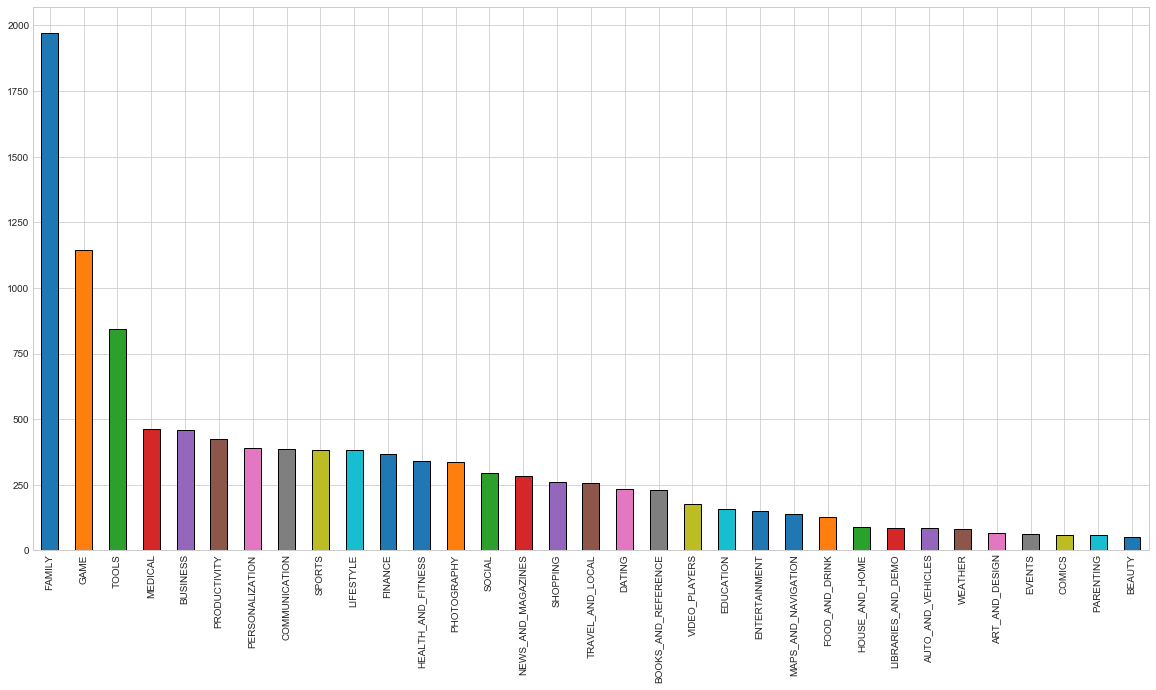

In [95]:
plt.figure(figsize=(20,10))
df['Category'].value_counts().plot(kind='bar')

In [96]:
# Fix Genre for entry 10472

In [97]:
df['Genres'].replace(to_replace='February 11, 2018',value='Tools',inplace=True)

In [98]:
## Last Updated column needs to be converted to datetime format for better analysis

In [99]:
## Last Updated column needs to be converted to datetime format for better analysis

In [100]:
df[df['Last Updated']=='1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,ART_AND_DESIGN,19.0,3000000.0,0.001,0.0,Free,0.0,Everyone,Tools,1.0.19,4.0 and up,Varies with device


In [101]:
## As we can see entry number 10472 has many problems with its data and it has zero installs so we will
## drop this entry. ( also I was not able to find any info on this app as the url for it on google play has been deleted)

In [102]:
df.drop(df.index[10472], inplace=True)

In [103]:
df.drop_duplicates(inplace=True)

In [104]:
## Now we can go back to changing the str form of Last Updated to date time

In [105]:
df['Last Updated']=pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

In [106]:
## I want to create a column with only the year

In [107]:
df['Year Updated'] = pd.DatetimeIndex(df['Last Updated']).year

In [108]:
## Android Ver Column looks a little messy with 'and up'

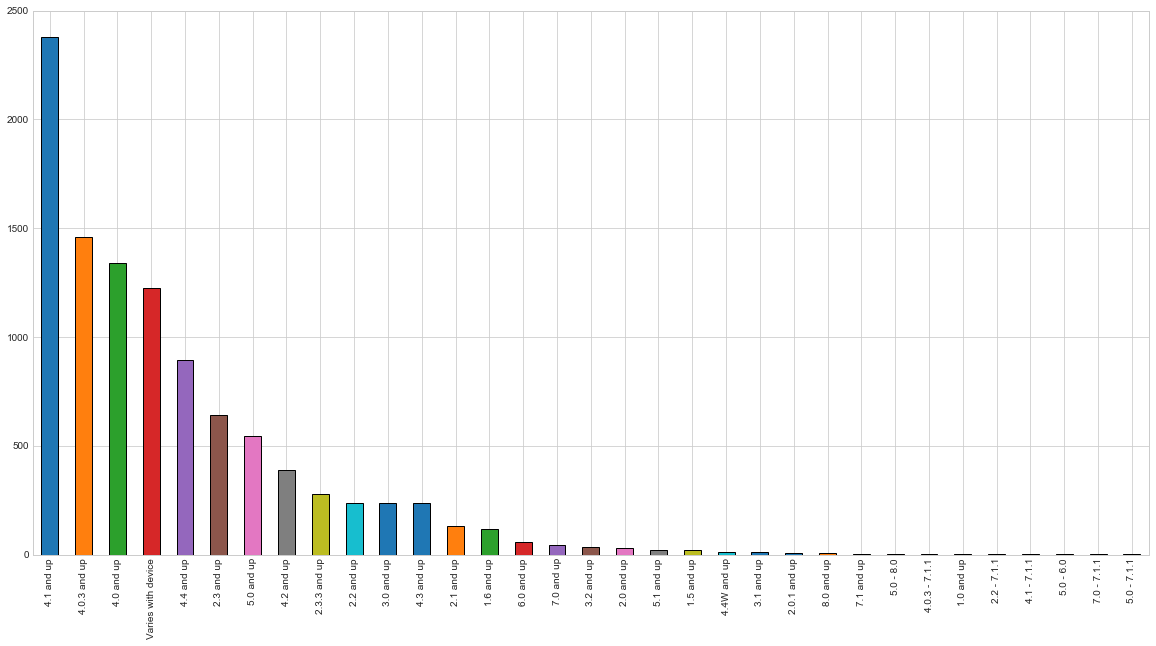

In [109]:
plt.figure(figsize=(20,10))
df['Android Ver'].value_counts().plot(kind='bar')

In [110]:
df['Android Ver']=df['Android Ver'].str.replace('and up','')

In [111]:
## Content Rating column

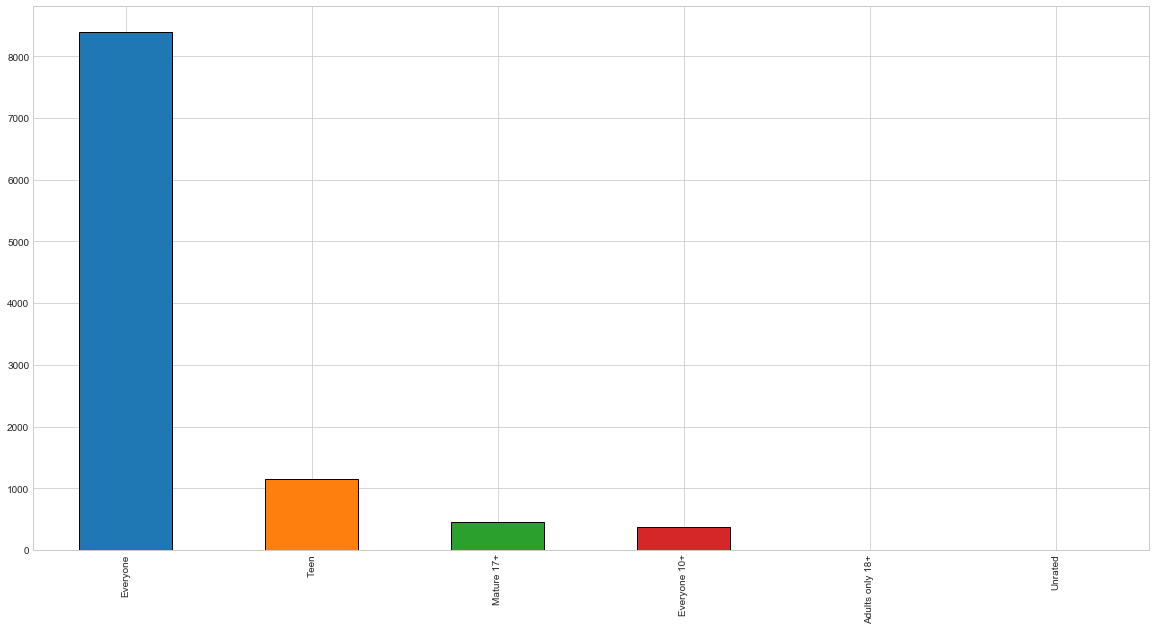

In [112]:
plt.figure(figsize=(20,10))
df['Content Rating'].value_counts().plot(kind='bar')


In [113]:
## Heatmap of numericals 

In [114]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Year Updated
Rating,1.000000,0.084880,0.012270,0.078631,-0.024413,0.109192
Reviews,0.084880,1.000000,0.002236,0.635005,-0.009431,0.075726
Size,0.012270,0.002236,1.000000,-0.060681,-0.000838,0.096029
Installs,0.078631,0.635005,-0.060681,1.000000,-0.011163,0.087360
Price,-0.024413,-0.009431,-0.000838,-0.011163,1.000000,-0.005676
Year Updated,0.109192,0.075726,0.096029,0.087360,-0.005676,1.000000


Text(0.5,1,'HeatMAP of Numericals')

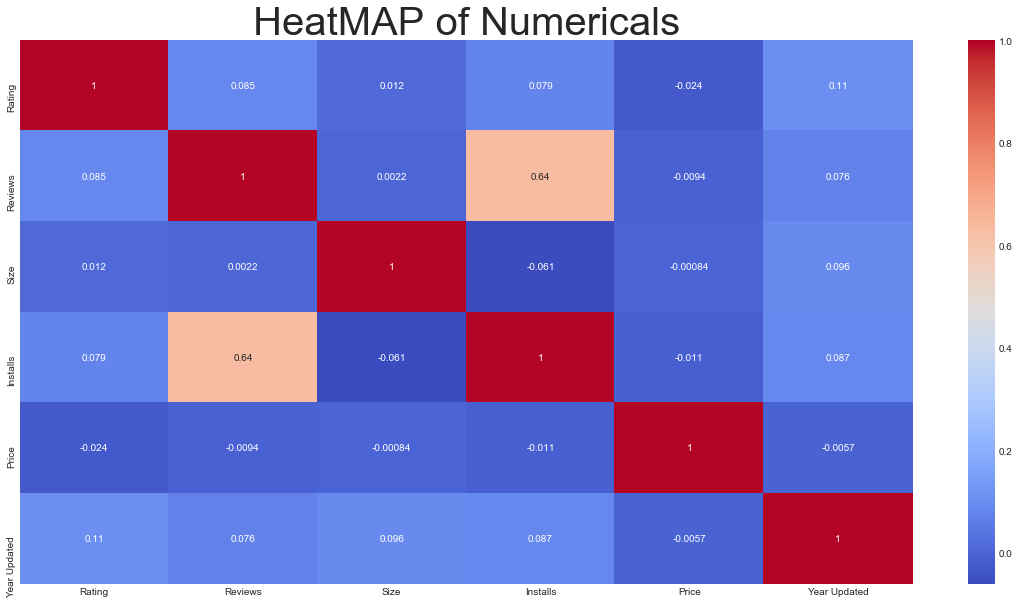

In [115]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('HeatMAP of Numericals',fontdict={'fontsize':40})


In [116]:
## heatmap of numericals does not exactly help us in our analysis.
## Installs is highly correlated with Reviews. Which is quite obvious.
## Year Updated is the only thing slightly correlated with Rating. However, it is not enough to influence ratings.
## Deeper analysis required to derive any actionable insights from this data.

In [117]:
## We have over 90% apps with the 'Everyone' type therefore graph only explains the obvious

Text(0.5,1,'Box Plot of Ratings by Category')

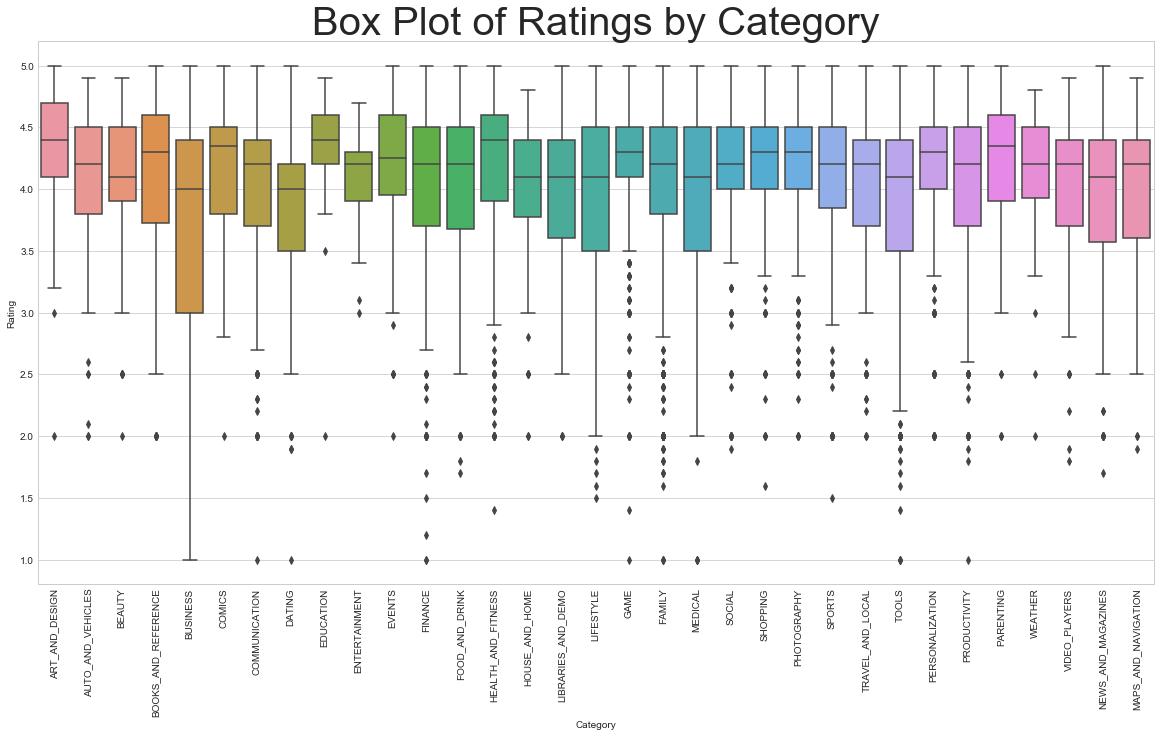

In [118]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Category'],y=df['Rating'])
plt.xticks(rotation=90)
plt.title('Box Plot of Ratings by Category',fontdict={'fontsize':40})

In [119]:
# Highest Median Ratings were recorded for Categories of : Art_And_Design, Education, Health_And_Fitness & Parenting.
# Most outliers recorded on both ends were for Dating.
# Smallest IQR range was recorded for Dating.
# No outliers recorded for: Art_And_Design, and Weather
# Most difficult app market to break into would be Dating, with the lowest Median recorded and most outliers on both ends.
# Easier markets to break into would include: Art_And_Design, Education, Weather, & Events


Text(0.5,1,'Violin Plot of Ratings by Category')

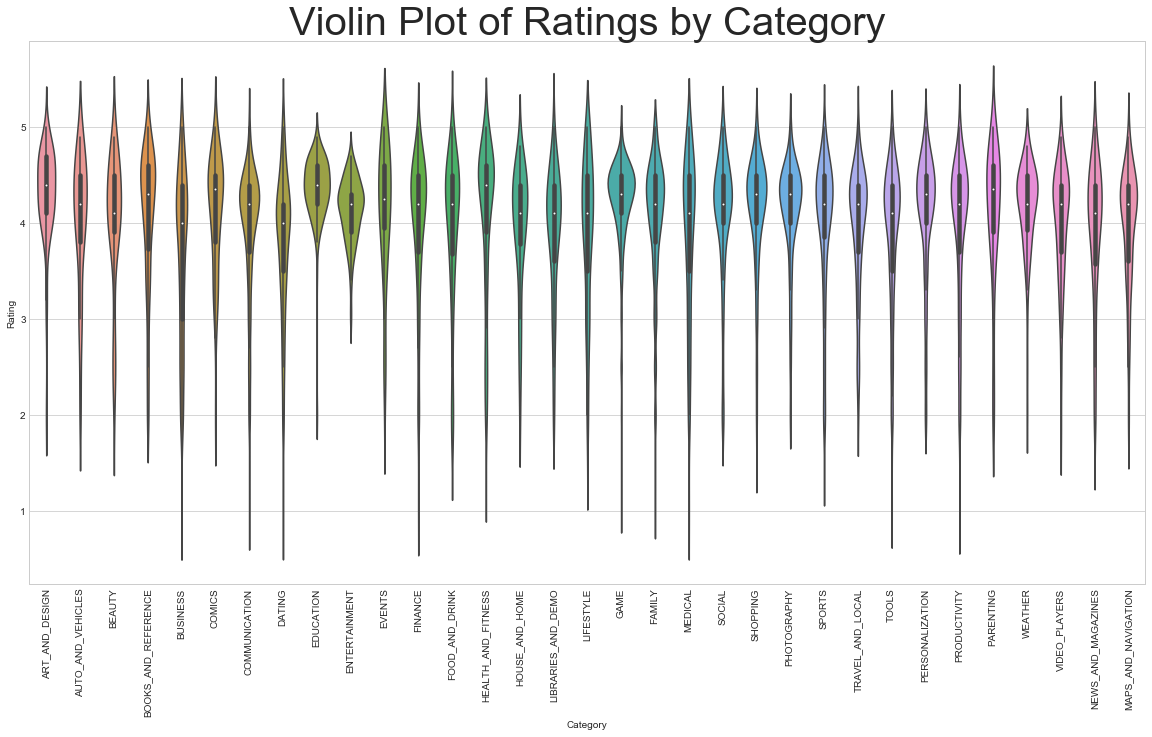

In [120]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df['Category'],y=df['Rating'])
plt.xticks(rotation=90)
plt.title('Violin Plot of Ratings by Category',fontdict={'fontsize':40})

In [121]:
# A different type of visualization(violin plot) for the same two variables: Category v Rating


Text(0.5,1,'Plot of Ratings by Category')

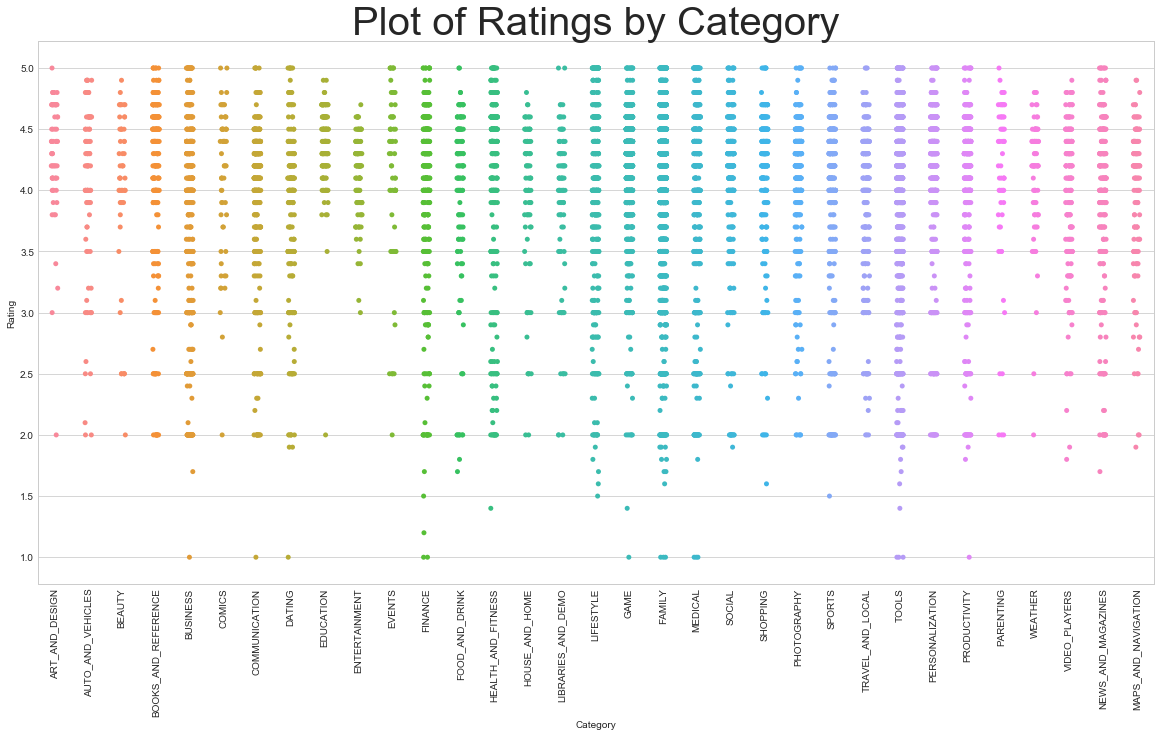

In [122]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df['Category'],y=df['Rating'],jitter=True)
plt.xticks(rotation=90)
plt.title('Plot of Ratings by Category',fontdict={'fontsize':40})

In [123]:
# Stripplot of Category V Rating. Similar insights from Boxplot. Different way to look at the data.

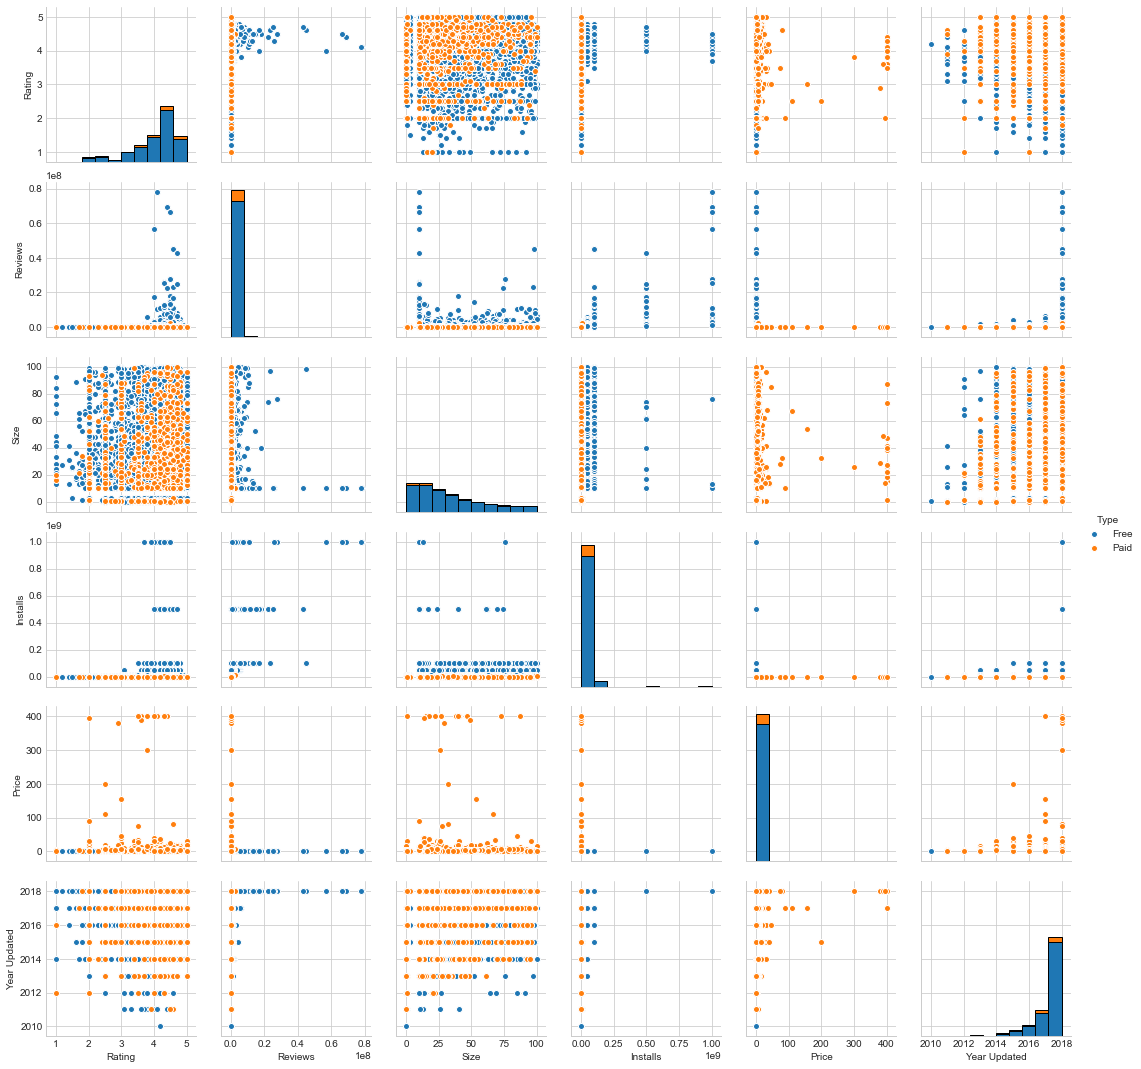

In [124]:
sns.pairplot(df,hue='Type')



In [125]:
# Pairplot of all the different variables. (every variable is paired together, and a distribution plot for each variable)
# Size v Rating Plot (3rd Row and 1st Column)- shows how paid Apps are more highly rated.
# We will inspect some of these pairs as we move on

In [126]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,56.0,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3,2017
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3,2018
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2,2018
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0,2017
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,31.0,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3,2018


Text(1,1,'Size Vs Rating')

<Figure size 1440x720 with 0 Axes>

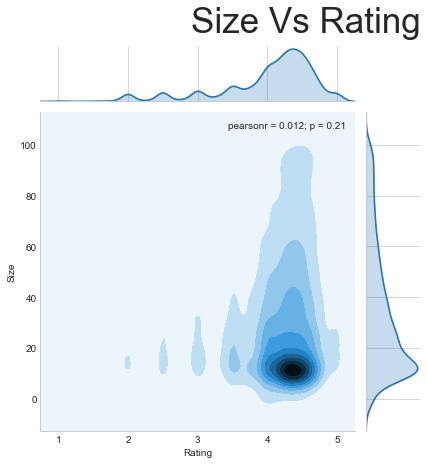

In [127]:
plt.figure(figsize=(20,10))
sns.jointplot(x=df['Rating'],y=df['Size'],kind='kde')
plt.title('Size Vs Rating',fontdict={'fontsize':35},loc='right',pad=80)

In [128]:
# Kernel Density Estimation of Size vs Rating. 
# Clearly, most highly rated apps are under 60MB
# The core of the Kernel Density around 4.5 Rating clearly shows that most of those apps range only between 1-20 MB

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,1,'Price Vs Rating')

<Figure size 1440x720 with 0 Axes>

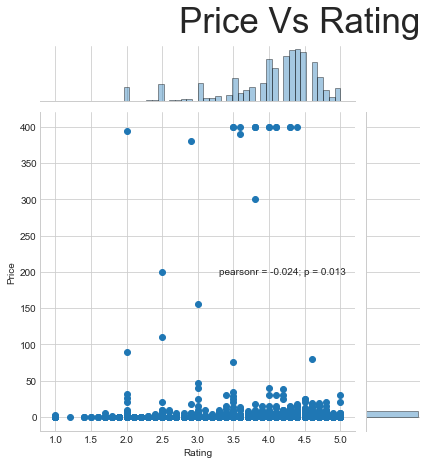

In [129]:
plt.figure(figsize=(20,10))
sns.jointplot(x=df['Rating'],y=df['Price'],kind='scatter')
plt.title('Price Vs Rating',fontdict={'fontsize':35},loc='right',pad=80)

In [130]:
# We can see that as we move into higher ratings there is a slight increase in the number of dots in price range of 50$
# The Price outliers above 350 are useless applications
# Still most highly rated apps are FREE!

Text(0,0.5,'')

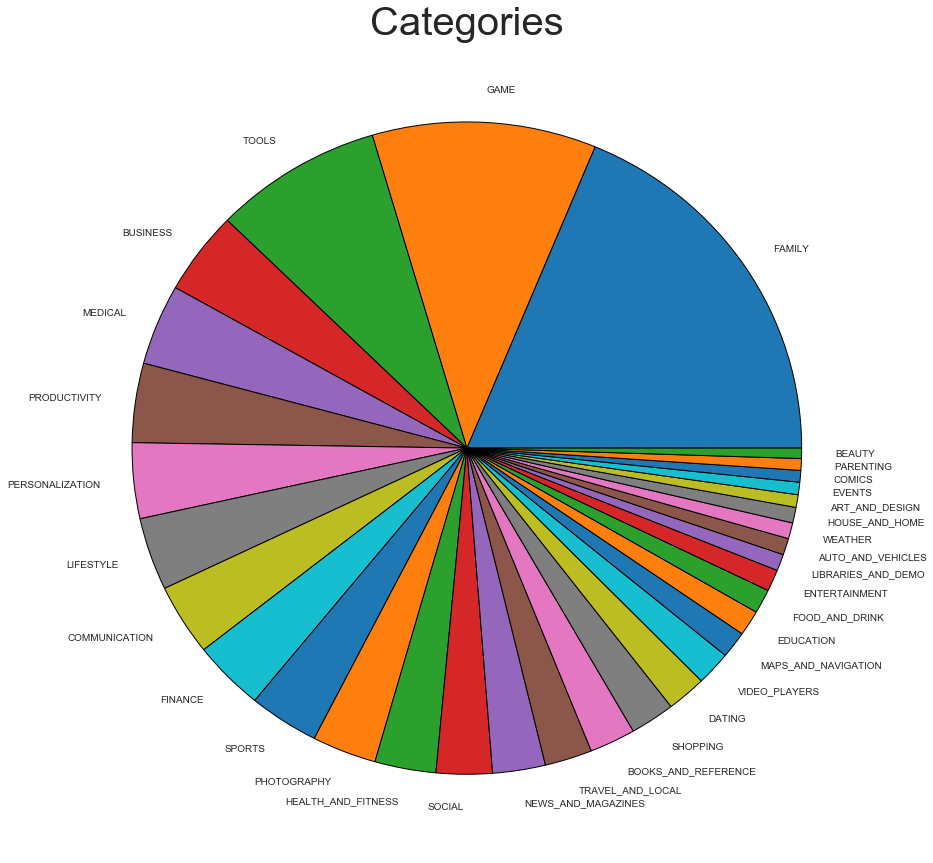

In [131]:
plt.figure(figsize=(15,15))
axes= df['Category'].value_counts().plot(kind='pie')
plt.title('Categories',fontdict= {'fontsize':40})
plt.ylabel('')


In [132]:
# Family, Game and Tools account for the top 3 number of apps in the store.
# TOP3 are also not the easiest of markets to break into for prospective app developers.

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

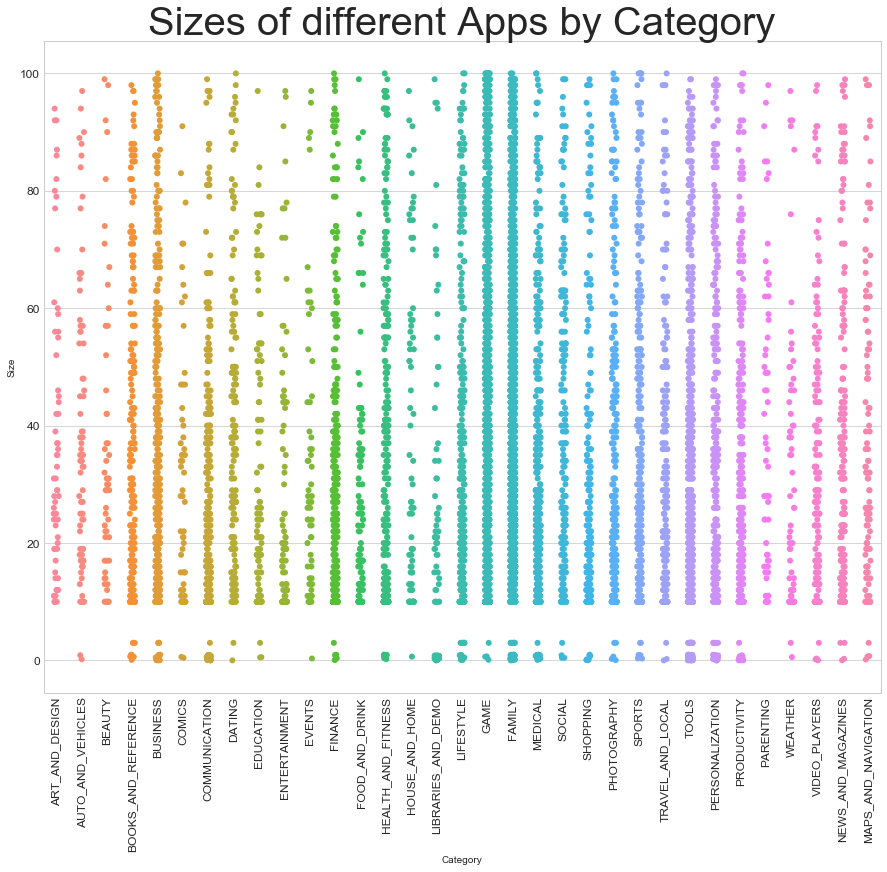

In [133]:
plt.figure(figsize=(15,12))
sns.stripplot(x=df['Category'],y=df['Size'],jitter=True,size=6)
plt.xticks(rotation=90)
plt.title('Sizes of different Apps by Category',fontdict={'fontsize':40})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [134]:
#  Game and Family appear to have the most apps with high sizes. However, it would be be foolish to not recognize that
#  those apps are also the most in number.
# Some Categories have no occurances below 10MB

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,1,'Rating Vs Reviews')

<Figure size 1440x720 with 0 Axes>

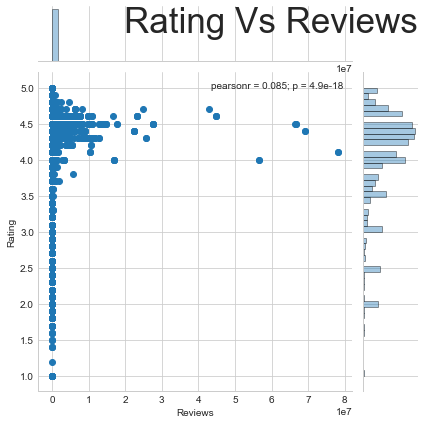

In [135]:
plt.figure(figsize=(20,10))
sns.jointplot(x=df['Reviews'],y=df['Rating'],kind='scatter')
plt.title('Rating Vs Reviews',fontdict={'fontsize':35},loc='right',pad=40)

In [136]:
# Ratings of Apps that are 3.5 and above tend to have more reviews.
# Most reviews are for apps with ratings of 4-4.75

Text(0.5,1,'Type')

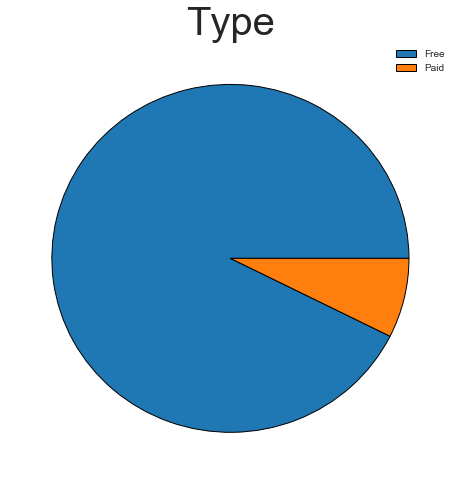

In [137]:
plt.figure(figsize=(8,8))
df['Type'].value_counts().plot(kind='pie',legend=True,labels=None)
plt.ylabel('')
plt.title('Type',fontdict={'fontsize':40})

In [138]:
#  Free apps are the most common apps on the market by a huge margin.

Text(0.5,1,'Year Updated')

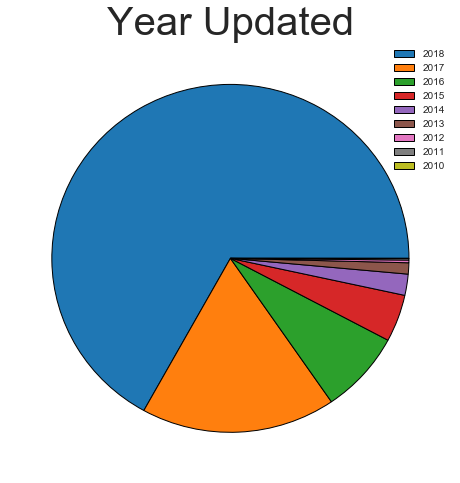

In [139]:
plt.figure(figsize=(8,8))
df['Year Updated'].value_counts().plot(kind='pie',legend=True,labels=None)
plt.ylabel('')
plt.title('Year Updated',fontdict={'fontsize':40})

In [140]:
# Apps updated in 2018 and 2017 account for over 75% of the market.
# Interesting to see that the market still has substantial number of apps that were only updated in 2016 & 2015. 

Text(0.5,1,'Content Rating')

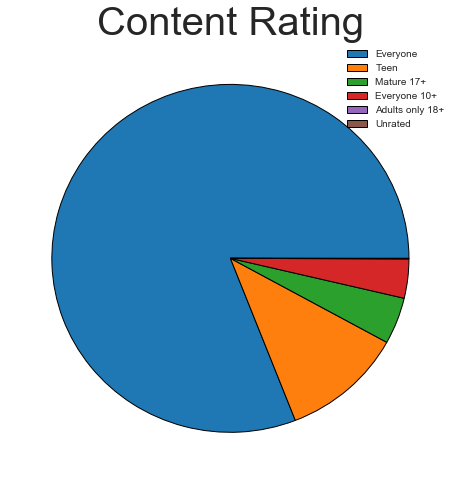

In [141]:
plt.figure(figsize=(8,8))
df['Content Rating'].value_counts().plot(kind='pie',labels=None,legend=True)
plt.ylabel('')
plt.title('Content Rating',fontdict={'fontsize':40})


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

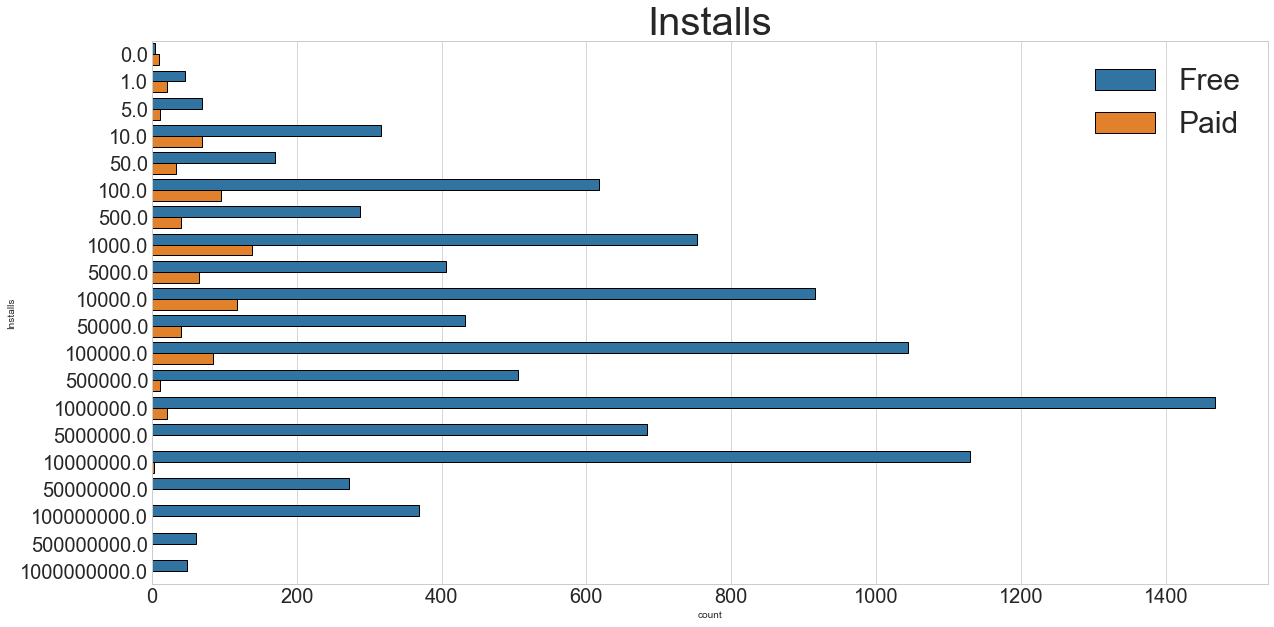

In [157]:
plt.figure(figsize=(20,10))
sns.countplot(y=df['Installs'],hue=df['Type'])
plt.xticks(rotation=90)
plt.legend(prop={'size':30})
plt.title('Installs',fontdict={'fontsize':40})
plt.xticks(fontsize=20,rotation=360)
plt.yticks(fontsize=20)


In [143]:
# Free Apps are clearly the most installed and used apps.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text yticklabel objects>)

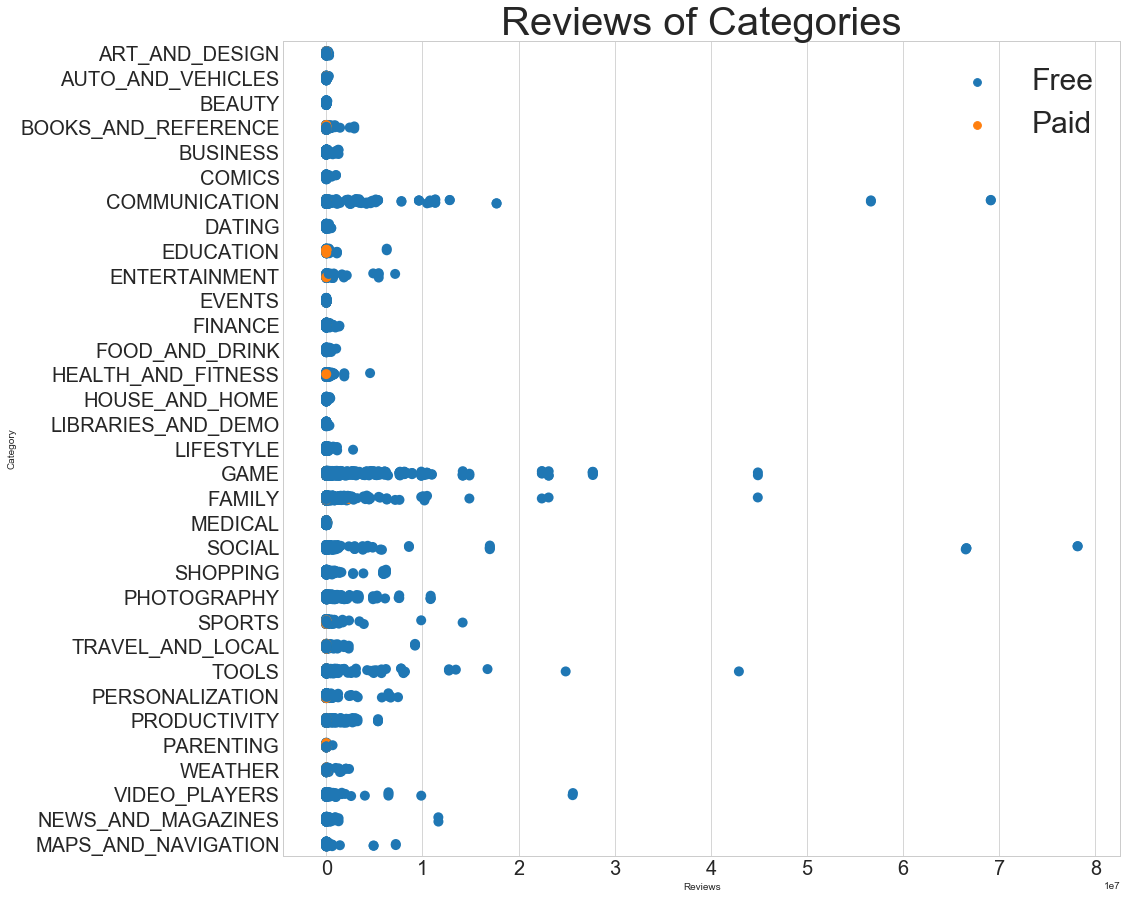

In [158]:
plt.figure(figsize=(15,15))
sns.stripplot(x=df['Reviews'],y=df['Category'],jitter=True,hue=df['Type'],size=10)
plt.xticks(rotation=90)
plt.legend(prop={'size':30})
plt.title('Reviews of Categories',fontdict={'fontsize':40})
plt.xticks(fontsize=20,rotation=360)
plt.yticks(fontsize=20)

In [145]:
# Communication, Social and Parenting Categories have a couple or more apps with a vast amount of reviews.
# Game, Family and Tools categories have the most number of apps with relatively high reviews.

In [146]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,56.0,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3,2017
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3,2018
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2,2018
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0,2017
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,31.0,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3,2018


No handles with labels found to put in legend.


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text yticklabel objects>)

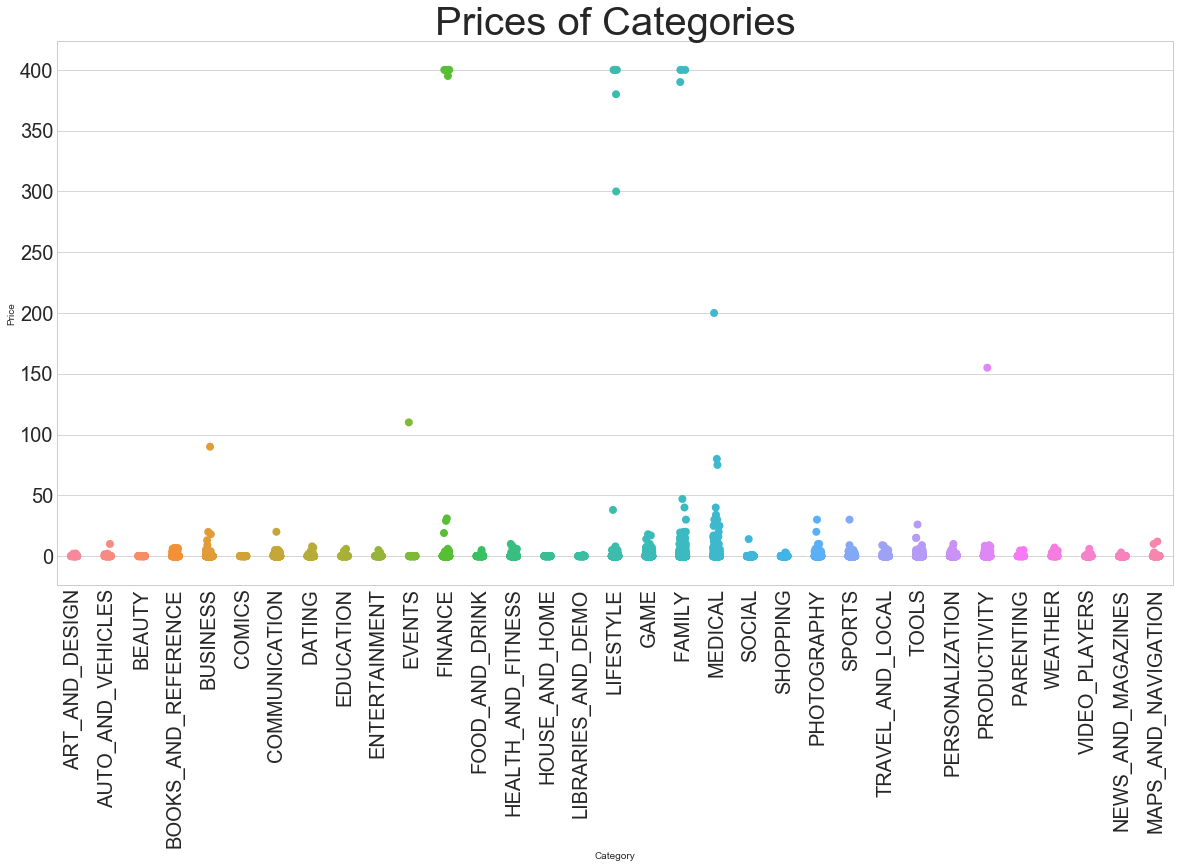

In [147]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df['Category'],y=df['Price'],jitter=True,size=8)
plt.xticks(rotation=90)
plt.legend(prop={'size':30})
plt.title('Prices of Categories',fontdict={'fontsize':40})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [148]:
# Most app Categorie have their prices ranging from 0-50$. 
# The hyper priced outliers are shown below

In [149]:
df[df['Price']>399][['App','Price','Installs']]

,App,Price,Installs
4197,most expensive app (H),399.99,100.0
4362,💎 I'm rich,399.99,10000.0
4367,I'm Rich - Trump Edition,400.00,10000.0
5351,I am rich,399.99,100000.0
5354,I am Rich Plus,399.99,10000.0
5356,I Am Rich Premium,399.99,50000.0
5358,I am Rich!,399.99,1000.0
5359,I am rich(premium),399.99,5000.0
5362,I Am Rich Pro,399.99,5000.0
5364,I am rich (Most expensive app),399.99,1000.0
